# Full WalkForward Testing

In [1]:
import pandas, numpy as np
import matplotlib.pyplot as plt

In [2]:
import utils
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [3]:
%matplotlib inline

In [4]:
data_dir = 'data/histdata/'

In [5]:
pairs = utils.listCurrenciesInDir(data_dir)
pairs

['AUDJPY',
 'EURAUD',
 'EURCAD',
 'EURGBP',
 'EURUSD',
 'GBPUSD',
 'USDCAD',
 'USDJPY',
 'USDMXN']

In [6]:
def customCalcAlpha(series, trades):
    gains = [
        np.add((series[t[1]] - series[t[0]]) / series[t[0]], 1.0)
        for t in trades
    ]
    return np.product(gains)

In [7]:
from collections import defaultdict
def customCalcAlphaNoInnerCompound(series, trades):
    sellsDict = defaultdict(list)
    for v, k in trades: sellsDict[k].append(v)
    
    gainsAtEachSellPoint = []
    for sellInd, buyInds in sellsDict.items():
        gainForCurSellPoint = np.sum([
            (series[sellInd] - series[t]) / series[t]
            for t in buyInds
        ])
        gainsAtEachSellPoint.append(gainForCurSellPoint)
    return np.product(np.add(gainsAtEachSellPoint, 1.0))

## Run All Tests

In [8]:
results = []
summaries = []
for pair in pairs:
    print('---------- Executing : ', pair, '----------')
    pairDf = utils.readAllDatForCurrency(data_dir, pair)
    walkForward = utils.walkForwardInds(pairDf, 10, 0.85)
    
    walkResults = []
    walkSummary = []
    
    for walkSlice in walkForward:
        print('Slice :', walkSlice)
        tmpRes = utils.runDTBacktest(pairDf[walkSlice[0]:walkSlice[1]],
                                testname=pair+str(walkSlice),
                                output_calculators=[lambda s : utils.calcSmoothedGains(s, 30, 6*60)],
                                make_trades=lambda preds : utils.stdConfidenceTrades(preds, buy_confidence=1.5, sell_confidence=1.1),
                                calc_gains=customCalcAlphaNoInnerCompound)
        walkResults.append(tmpRes)
        walkSummary.append(utils.getSummary(tmpRes))
    
    results.append(walkResults)
    summaries.append(walkSummary)

# sortedResults = sorted(list(map(utils.getSummary, results)), key=lambda x: x['gain'])
# sortedResults.reverse()
# sortedResults

---------- Executing :  AUDJPY ----------
Slice : (0, 46075)


/Users/amclean/workspace/projects/fxboys/utils.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_out['preds'] = preds


Slice : (6911, 52986)
Slice : (13822, 59897)
Slice : (20733, 66808)
Slice : (27644, 73719)
Slice : (34555, 80630)
Slice : (41466, 87541)
Slice : (48377, 94452)
Slice : (55288, 101363)
Slice : (62199, 108274)
---------- Executing :  EURAUD ----------
Slice : (0, 46343)
Slice : (6951, 53294)
Slice : (13902, 60245)
Slice : (20853, 67196)
Slice : (27804, 74147)
Slice : (34755, 81098)
Slice : (41706, 88049)
Slice : (48657, 95000)
Slice : (55608, 101951)
Slice : (62559, 108902)
---------- Executing :  EURCAD ----------
Slice : (0, 46355)
Slice : (6953, 53308)
Slice : (13906, 60261)
Slice : (20859, 67214)
Slice : (27812, 74167)
Slice : (34765, 81120)
Slice : (41718, 88073)
Slice : (48671, 95026)
Slice : (55624, 101979)
Slice : (62577, 108932)
---------- Executing :  EURGBP ----------
Slice : (0, 45771)
Slice : (6865, 52636)
Slice : (13730, 59501)
Slice : (20595, 66366)
Slice : (27460, 73231)
Slice : (34325, 80096)
Slice : (41190, 86961)
Slice : (48055, 93826)
Slice : (54920, 100691)
Slice : (

## Output Test Results

In [9]:
summaries

[[{'testname': 'AUDJPY(0, 46075)',
   'algo_gain': 1.1059531923266281,
   'buyhold_gain': 1.0090036739824095,
   'beat_market': True,
   'start_date': Timestamp('2018-07-11 22:19:00'),
   'end_date': Timestamp('2018-07-17 02:42:00')},
  {'testname': 'AUDJPY(6911, 52986)',
   'algo_gain': 0.9939657629375919,
   'buyhold_gain': 0.9839538868982691,
   'beat_market': True,
   'start_date': Timestamp('2018-07-18 17:46:00'),
   'end_date': Timestamp('2018-07-23 22:08:00')},
  {'testname': 'AUDJPY(13822, 59897)',
   'algo_gain': 0.872297697440155,
   'buyhold_gain': 1.0005230507237597,
   'beat_market': False,
   'start_date': Timestamp('2018-07-25 13:16:00'),
   'end_date': Timestamp('2018-07-30 17:53:00')},
  {'testname': 'AUDJPY(20733, 66808)',
   'algo_gain': 1.0005116723479757,
   'buyhold_gain': 0.9923237289565375,
   'beat_market': True,
   'start_date': Timestamp('2018-08-01 09:15:00'),
   'end_date': Timestamp('2018-08-06 13:43:00')},
  {'testname': 'AUDJPY(27644, 73719)',
   'algo_g

In [10]:
summariesDf = pandas.DataFrame(np.array(summaries).flatten().tolist())
summariesDf['pair'] = summariesDf.testname.map(lambda name : name[0:6])

In [11]:
summariesDf

,algo_gain,beat_market,buyhold_gain,end_date,start_date,testname,pair
0,1.105953,True,1.009004,2018-07-17 02:42:00,2018-07-11 22:19:00,"AUDJPY(0, 46075)",AUDJPY
1,0.993966,True,0.983954,2018-07-23 22:08:00,2018-07-18 17:46:00,"AUDJPY(6911, 52986)",AUDJPY
2,0.872298,False,1.000523,2018-07-30 17:53:00,2018-07-25 13:16:00,"AUDJPY(13822, 59897)",AUDJPY
3,1.000512,True,0.992324,2018-08-06 13:43:00,2018-08-01 09:15:00,"AUDJPY(20733, 66808)",AUDJPY
4,0.992662,True,0.980685,2018-08-13 09:05:00,2018-08-08 04:52:00,"AUDJPY(27644, 73719)",AUDJPY
5,2.275250,True,1.007973,2018-08-20 04:48:00,2018-08-15 00:25:00,"AUDJPY(34555, 80630)",AUDJPY
6,1.119683,True,1.003714,2018-08-27 00:14:00,2018-08-21 19:57:00,"AUDJPY(41466, 87541)",AUDJPY
7,1.117376,True,0.979067,2018-09-02 19:51:00,2018-08-28 15:28:00,"AUDJPY(48377, 94452)",AUDJPY
8,0.958580,False,0.987256,2018-09-07 15:23:00,2018-09-04 11:01:00,"AUDJPY(55288, 101363)",AUDJPY
9,1.257838,True,1.017792,2018-09-14 10:55:00,2018-09-11 06:36:00,"AUDJPY(62199, 108274)",AUDJPY


## Overview of Algo Wins/Losses

In [12]:
print('Algo Gain :',summariesDf.algo_gain.mean())
print('Buy/Hold Gain :',summariesDf.buyhold_gain.mean())

Algo Gain : 1.0622999639193889
Buy/Hold Gain : 0.9986655508433108


In [13]:
print('Algo outperformed market :')
summariesDf.beat_market.value_counts()

Algo outperformed market :


True     56
False    34
Name: beat_market, dtype: int64

In [14]:
print('Avg winnings :', summariesDf[summariesDf.beat_market].algo_gain.mean())
print('Avg losses :', summariesDf[summariesDf.beat_market == False].algo_gain.mean())

Avg winnings : 1.1797360924032059
Avg losses : 0.8688757522989838


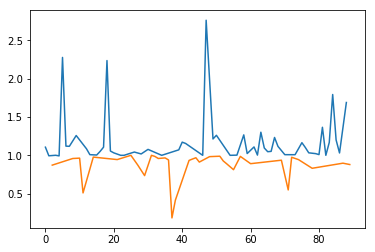

In [15]:
plt.plot(summariesDf[summariesDf.beat_market].algo_gain)
plt.plot(summariesDf[summariesDf.beat_market == False].algo_gain)

## No Outliers BeatMarket Gains vs Losses

Winnings when algo beat the market : 1.1093580349309868
Losses when algo didn't beat the market : 0.9044248920130438


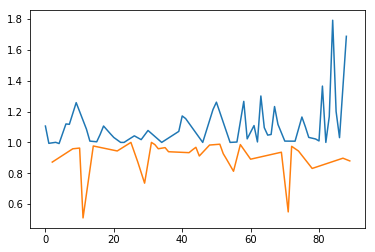

In [16]:
algo_gain = summariesDf[summariesDf.beat_market].algo_gain
smooth_algo_gain = algo_gain[np.abs(algo_gain-algo_gain.mean()) <= (2*algo_gain.std())]
plt.plot(smooth_algo_gain)

algo_loss = summariesDf[summariesDf.beat_market == False].algo_gain
smooth_algo_loss = algo_loss[np.abs(algo_loss-algo_loss.mean()) <= (2*algo_loss.std())]
plt.plot(smooth_algo_loss)

print('Winnings when algo beat the market :', smooth_algo_gain.mean())
print('Losses when algo didn\'t beat the market :', smooth_algo_loss.mean())

In [17]:
winsVsLosses = summariesDf.beat_market.value_counts()
print('Magnitude of Gains vs Losses :', smooth_algo_gain.mean() * smooth_algo_loss.mean())

gainsVsLossPerformance = winsVsLosses.loc[True]/winsVsLosses.sum() * \
      smooth_algo_gain.mean()\
      -\
      winsVsLosses.loc[False]/winsVsLosses.sum() * \
      smooth_algo_loss.mean()
print('Weighted Gains - Losses :', gainsVsLossPerformance)
print('\nAka our wins outperformed our losses by',gainsVsLossPerformance*100, '%')

Magnitude of Gains vs Losses : 1.0033310209462603
Weighted Gains - Losses : 0.3485955958632419

Aka our wins outperformed our losses by 34.85955958632419 %
